In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
dir = "//content/drive/MyDrive/Assignment_HOOM/"

In [42]:
df = pd.read_csv(dir + 'CSUSHPISA.csv')
df

,DATE,CSUSHPISA
0,2000-01-01,100.552
1,2000-02-01,101.339
2,2000-03-01,102.127
3,2000-04-01,102.922
4,2000-05-01,103.677
...,...,...
265,2022-02-01,290.371
266,2022-03-01,296.362
267,2022-04-01,301.409
268,2022-05-01,305.179


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       270 non-null    object 
 1   CSUSHPISA  270 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [47]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [44]:
df.isnull().sum()

DATE         0
CSUSHPISA    0
dtype: int64

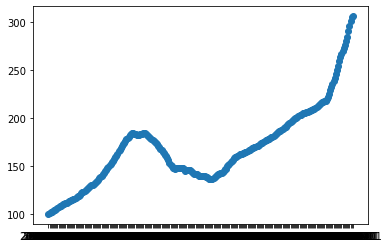

In [45]:
plt.scatter(df.DATE, df.CSUSHPISA)
plt.show()

In [46]:
from scipy import stats
import numpy as np
df[(np.abs(stats.zscore(df['CSUSHPISA'])) > 3)]

,DATE,CSUSHPISA
266,2022-03-01,296.362
267,2022-04-01,301.409
268,2022-05-01,305.179
269,2022-06-01,306.181


In [48]:
average = df.groupby(pd.PeriodIndex(df['DATE'], freq = "M"))['CSUSHPISA'].mean()
average = average.to_frame()
average

,CSUSHPISA
DATE,
2000-01,100.552
2000-02,101.339
2000-03,102.127
2000-04,102.922
2000-05,103.677
...,...
2022-02,290.371
2022-03,296.362
2022-04,301.409


In [49]:
average = average.reset_index()

In [50]:
average['DATE'] = average['DATE'].astype(str)
average['DATE'] = pd.to_datetime(average['DATE'])

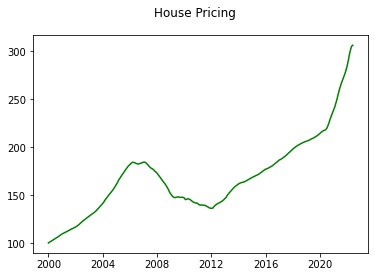

In [51]:
plt.plot(average['DATE'], average['CSUSHPISA'], "g-")

plt.suptitle("House Pricing")
plt.show()

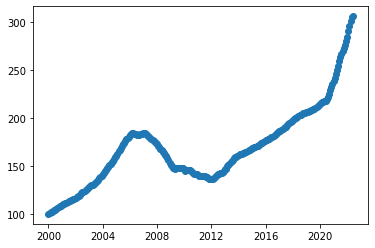

In [52]:
plt.scatter(average.DATE, average.CSUSHPISA)
plt.show()

In [53]:
average.set_index(['DATE'],inplace=True)
average

,CSUSHPISA
DATE,
2000-01-01,100.552
2000-02-01,101.339
2000-03-01,102.127
2000-04-01,102.922
2000-05-01,103.677
...,...
2022-02-01,290.371
2022-03-01,296.362
2022-04-01,301.409


In [54]:
average.to_csv('house_pricing_final.csv')